### Урок 2. Keras

##### Используем набор примеров fashion-MNIST  
1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [5]:
import keras
keras.__version__

'2.4.3'

In [6]:
keras.backend.backend()

'tensorflow'

In [8]:
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
import numpy as np


(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 8


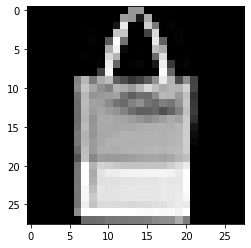

In [9]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

In [10]:
X_train.min(), X_train.max()

(0, 255)

In [11]:
# Нормировка
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [12]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

##### Двухслойная модель

In [111]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(66, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 66)                51810     
_________________________________________________________________
dense_113 (Dense)            (None, 10)                670       
Total params: 52,480
Trainable params: 52,480
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [113]:
y_train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [114]:
from keras.utils import to_categorical

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [115]:
X_train.shape

(60000, 784)

In [116]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, 
                    validation_split=0.2)

Epoch 1/5
4800/4800 [==============================] - 6s 1ms/step - loss: 0.8173 - accuracy: 0.7329 - val_loss: 0.5137 - val_accuracy: 0.8141
Epoch 2/5
4800/4800 [==============================] - 6s 1ms/step - loss: 0.4771 - accuracy: 0.8351 - val_loss: 0.4458 - val_accuracy: 0.8446
Epoch 3/5
4800/4800 [==============================] - 6s 1ms/step - loss: 0.4289 - accuracy: 0.8494 - val_loss: 0.4163 - val_accuracy: 0.8543
Epoch 4/5
4800/4800 [==============================] - 6s 1ms/step - loss: 0.3971 - accuracy: 0.8583 - val_loss: 0.3949 - val_accuracy: 0.8620
Epoch 5/5
4800/4800 [==============================] - 6s 1ms/step - loss: 0.3873 - accuracy: 0.8615 - val_loss: 0.4040 - val_accuracy: 0.8590


In [117]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8488


(0.42693719267845154, 0.848800003528595)

##### Трехслойная модель

In [69]:
model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [81]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, 
                    validation_split=0.2)

Epoch 1/5
4800/4800 [==============================] - 5s 1ms/step - loss: 0.3630 - accuracy: 0.8710 - val_loss: 0.3993 - val_accuracy: 0.8596
Epoch 2/5
4800/4800 [==============================] - 4s 932us/step - loss: 0.3585 - accuracy: 0.8707 - val_loss: 0.3733 - val_accuracy: 0.8662
Epoch 3/5
4800/4800 [==============================] - 5s 960us/step - loss: 0.3432 - accuracy: 0.8791 - val_loss: 0.3686 - val_accuracy: 0.8686
Epoch 4/5
4800/4800 [==============================] - 4s 925us/step - loss: 0.3320 - accuracy: 0.8826 - val_loss: 0.3643 - val_accuracy: 0.8703
Epoch 5/5
4800/4800 [==============================] - 5s 959us/step - loss: 0.3157 - accuracy: 0.8864 - val_loss: 0.3777 - val_accuracy: 0.8688


In [82]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8575


(0.4066786468029022, 0.8575000166893005)

##### Пятислойная модель

In [96]:
model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_94 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_95 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_96 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_97 (Dense)             (None, 10)                170       
Total params: 53,290
Trainable params: 53,290
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [98]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, 
                    validation_split=0.2)

Epoch 1/5
4800/4800 [==============================] - 5s 1ms/step - loss: 1.1480 - accuracy: 0.5660 - val_loss: 0.5112 - val_accuracy: 0.8232
Epoch 2/5
4800/4800 [==============================] - 5s 997us/step - loss: 0.4726 - accuracy: 0.8282 - val_loss: 0.4772 - val_accuracy: 0.8326
Epoch 3/5
4800/4800 [==============================] - 5s 1ms/step - loss: 0.4104 - accuracy: 0.8498 - val_loss: 0.4127 - val_accuracy: 0.8505
Epoch 4/5
4800/4800 [==============================] - 5s 964us/step - loss: 0.3707 - accuracy: 0.8638 - val_loss: 0.3860 - val_accuracy: 0.8578
Epoch 5/5
4800/4800 [==============================] - 5s 968us/step - loss: 0.3533 - accuracy: 0.8701 - val_loss: 0.3857 - val_accuracy: 0.8611


In [99]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8462


(0.412767618894577, 0.8461999893188477)

##### Десятислойная модель

In [100]:
model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_99 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_100 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_101 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_102 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_103 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_104 (Dense)            (None, 16)              

In [101]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [102]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, 
                    validation_split=0.2)

Epoch 1/5
4800/4800 [==============================] - 6s 1ms/step - loss: 1.7363 - accuracy: 0.3498 - val_loss: 0.6508 - val_accuracy: 0.7697
Epoch 2/5
4800/4800 [==============================] - 5s 1ms/step - loss: 0.6088 - accuracy: 0.7761 - val_loss: 0.5356 - val_accuracy: 0.8107
Epoch 3/5
4800/4800 [==============================] - 5s 1ms/step - loss: 0.5075 - accuracy: 0.8198 - val_loss: 0.4991 - val_accuracy: 0.8223
Epoch 4/5
4800/4800 [==============================] - 5s 1ms/step - loss: 0.4575 - accuracy: 0.8368 - val_loss: 0.4526 - val_accuracy: 0.8447
Epoch 5/5
4800/4800 [==============================] - 5s 1ms/step - loss: 0.4258 - accuracy: 0.8511 - val_loss: 0.4045 - val_accuracy: 0.8642


In [103]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8528


(0.43305689096450806, 0.8528000116348267)

In [120]:
from prettytable import PrettyTable
import pandas as pd

data = [[2,86.15,84.88], [3,88.64,85.75], [5,87.01,84.62], [10,85.11,85.28]]
df = pd.DataFrame(data, columns=['число слоев', 'accuracy на обучении,%', 'accuracy на тесте,%'])

def generate_ascii_table(df):
    x = PrettyTable()
    x.field_names = df.columns.tolist()
    for row in df.values:
        x.add_row(row)
    print(x)
    return x

generate_ascii_table(df)

+-------------+------------------------+---------------------+
| число слоев | accuracy на обучении,% | accuracy на тесте,% |
+-------------+------------------------+---------------------+
|     2.0     |         86.15          |        84.88        |
|     3.0     |         88.64          |        85.75        |
|     5.0     |         87.01          |        84.62        |
|     10.0    |         85.11          |        85.28        |
+-------------+------------------------+---------------------+


##### Вывод: Оптимальной по метрике получилась трехслойнай модель, при близких размерах сети

In [121]:
from keras.optimizers import SGD
SGD(learning_rate=0.01, momentum=0.5)

In [122]:
from keras.optimizers import Adam
Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [123]:
from keras.optimizers import RMSprop
RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8179 - accuracy: 0.7272 - val_loss: 0.5770 - val_accuracy: 0.8024
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5158 - accuracy: 0.8213 - val_loss: 0.5087 - val_accuracy: 0.8194
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4693 - accuracy: 0.8367 - val_loss: 0.4862 - val_accuracy: 0.8320
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4403 - accuracy: 0.8474 - val_loss: 0.4587 - val_accuracy: 0.8365
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4203 - accuracy: 0.8531 - val_loss: 0.4571 - val_accuracy: 0.8370
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5321 - accuracy: 0.8140 - val_loss: 0.4591 - val_accuracy: 0.8348
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3911 - accuracy: 0.8584 - val_loss: 0.4194 - val_accuracy: 0.8466

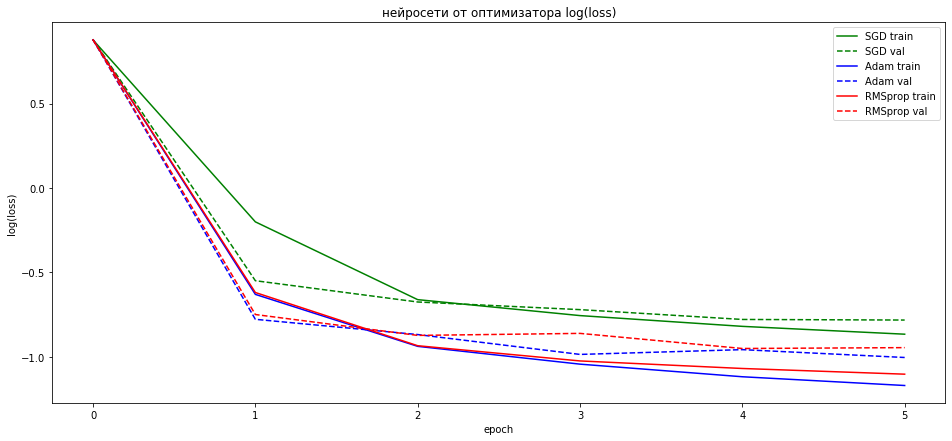

Wall time: 44.8 s


In [124]:
%%time

# создаем модель model
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid'),
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model_weights.h5')

# будем сохранять модели в словарь
models = {}


plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r', 'y']

num_epochs = 5
batch_size = 32

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate([keras.optimizers.SGD(),
                             keras.optimizers.Adam(),
                             keras.optimizers.RMSprop()]):
    
    # создаем рабочую модель  model_i, куда будем загружать эти веса (она должна быть идентичной структуры)
    model_i = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(32, activation='relu'),
        Dense(10, activation='sigmoid'),
    ])
    
    # загружаем веса model_i.load_weights('model.h5')
    model_i.load_weights('model_weights.h5')
    
    # компилируем model_i с одним из оптимизаторов
    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    
    # вычисляем ошибку для modeli без обучения
    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)

    # проводим обучение модели 
    h = model_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)
    
    # записываем обученную модель в словарь
    models[i_optim.get_config()['name']] = model_i

    # картинки
    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' val')

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [125]:
data = [['SGD',85.31,83.70], ['Adam',88.78,86.89], ['RMSprop',88.30,86.58]]
df = pd.DataFrame(data, columns=['Оптимизатор', 'accuracy на обучении,%', 'accuracy на тесте,%'])

generate_ascii_table(df)

+-------------+------------------------+---------------------+
| Оптимизатор | accuracy на обучении,% | accuracy на тесте,% |
+-------------+------------------------+---------------------+
|     SGD     |         85.31          |         83.7        |
|     Adam    |         88.78          |        86.89        |
|   RMSprop   |          88.3          |        86.58        |
+-------------+------------------------+---------------------+


##### Вывод: улучшить качество классификации в нейросети на тестовом наборе удалось с применением оптимизатора Adam